In [2]:
# Pandas y otros
import pandas as pd
import numpy as np

In [4]:
# Mathplotlib
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 6.0)

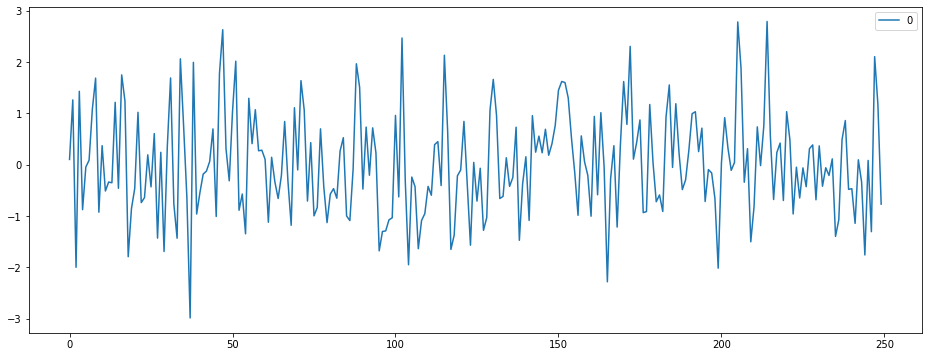

In [20]:
data1 = pd.DataFrame(np.random.randn(250))
data1.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x6b03c9d0>]],
      dtype=object)

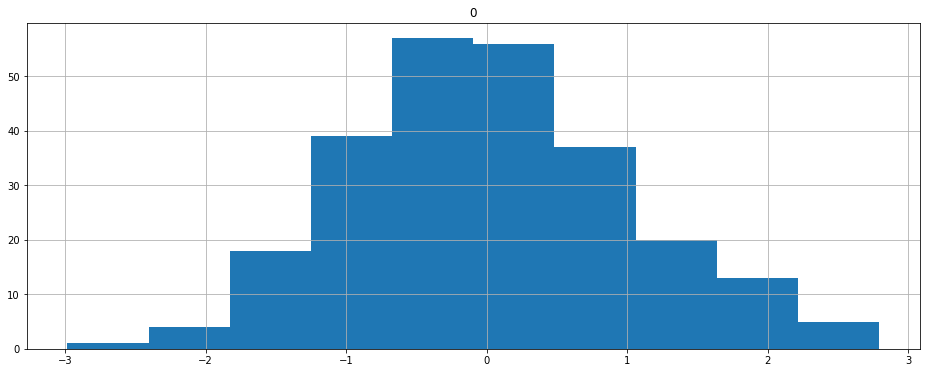

In [21]:
data1.hist()

In [22]:
data1.std() # desviacion estandar

0    1.009477
dtype: float64

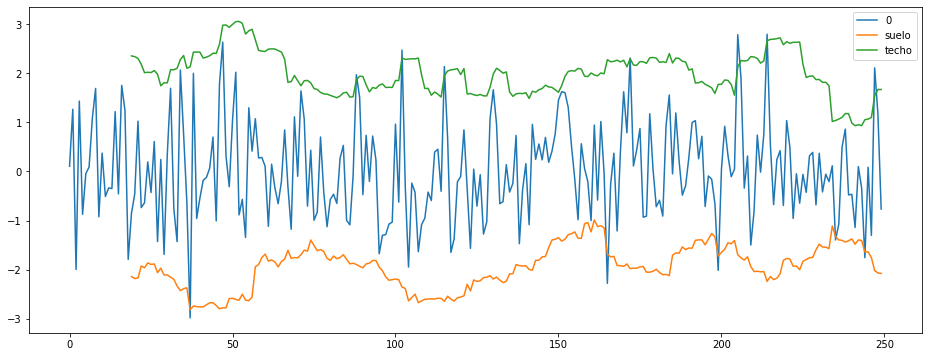

In [23]:
wind = 20
sigma = 2 # 2 desviaciones estadar menos del 20% de data estara aqui

data1["suelo"] = data1[0].rolling(window=wind)\
    .mean() - (sigma * data1[0].rolling(window=wind).std())
data1["techo"] = data1[0].rolling(window=wind)\
    .mean() + (sigma * data1[0].rolling(window=wind).std())
data1.plot()

In [24]:
data1["anom"] = data1.apply(
    lambda row: row[0] if (row[0]<=row["suelo"] or row[0]>=row["techo"]) else 0, axis=1)

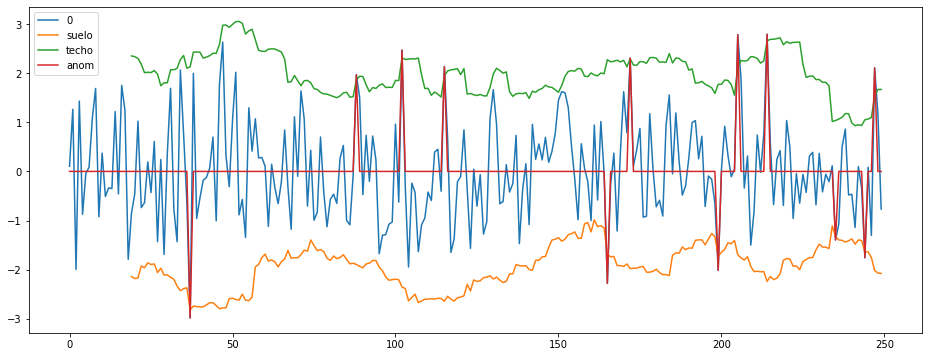

In [25]:
data1.plot()

In [12]:
data = pd.read_csv("github_commits_2014_2018.csv", index_col=1 )
data.head()

,count
date,
2014-01-01,33141
2014-01-02,58431
2014-01-03,61279
2014-01-04,45714
2014-01-05,46093


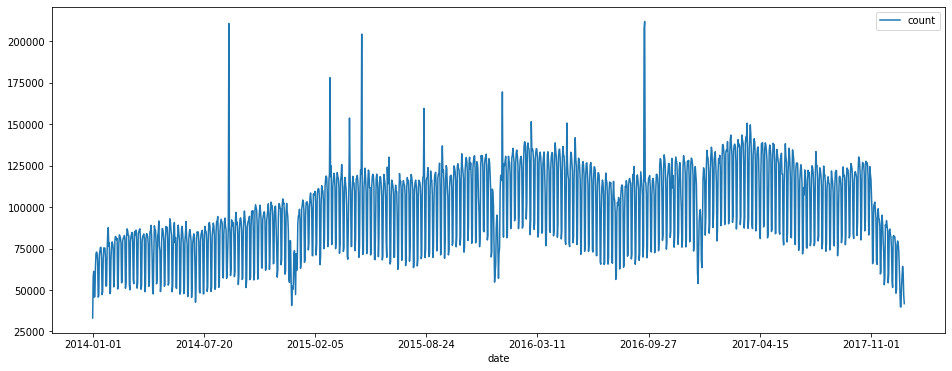

In [13]:
data.plot()

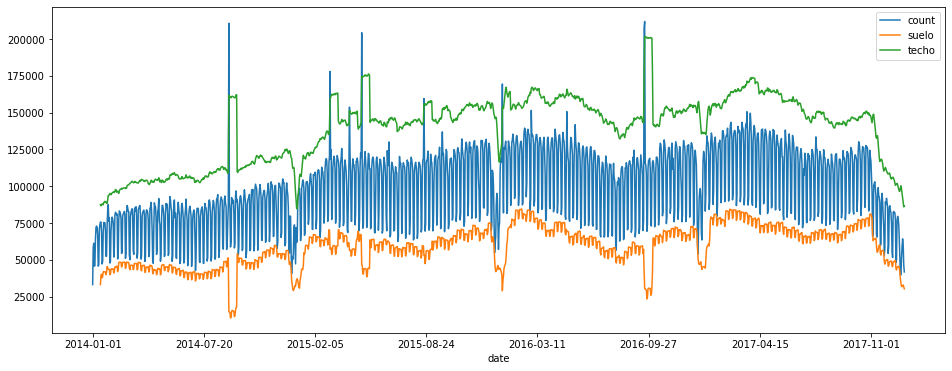

In [14]:
wind = 15
sigma = 2

data["suelo"] = data["count"].rolling(window=wind)\
    .mean() - (sigma * data["count"].rolling(window=wind).std())
data["techo"] = data["count"].rolling(window=wind)\
    .mean() + (sigma * data["count"].rolling(window=wind).std())
data.plot()

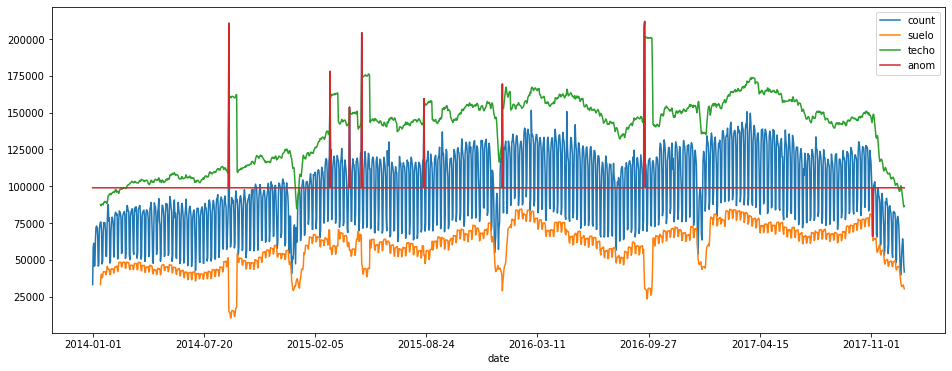

In [28]:
promedio = data['count'].mean()
data["anom"] = data.apply(
    lambda row: row["count"] if (row["count"]<=row["suelo"] or row["count"]>=row["techo"]) else promedio
, axis=1)
data.plot()

In [27]:
data['count'].mean()


98926.58726899384